In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime, date, time, timezone
import datetime as dt

In [2]:
data = pd.read_csv("../data/data20230831.csv")
data = data.copy()

# Data Analysis

In [4]:
data.tail(30)

,date,station_key,text,station name,lines,area,latitude,longitude
60312,2023-08-17 16:17:25,gesundbrunnen,2 blau u8 gesundbrunnen,Gesundbrunnen,"U8, S1, S2, S25, S26, S41, S42",Gesundbrunnen,52.548611,13.381250
60313,2023-08-17 16:26:06,alex,alex beiden herren vordergrund,Alexanderplatz,"U2, U5, U8, S3, S5, S7, S9",Mitte,52.521389,13.412639
60314,2023-08-17 16:31:28,lichtenberg,s lichtenberg 1x lange scgatehaare weisses t,Lichtenberg,"U5, S5, S7, S75",Lichtenberg,52.510556,13.496389
60315,2023-08-17 16:33:58,tempelhof,2 kontris tempelhof,Tempelhof,"U6, S41, S42, S45, S46",Tempelhof,52.470833,13.385278
60316,2023-08-17 17:24:54,goerli,u3 goerli bahnhof bahnsteig 2 blauwestne,Görlitzer Bahnhof,"U1, U3",Kreuzberg,52.499167,13.428056
60317,2023-08-18 05:48:59,wuhletal,2 personen manl weibl s5 aktuell wuhletal,Wuhletal,"U5, S5",Kaulsdorf,52.512500,13.575000
60318,2023-08-18 07:04:24,frankfurter tor,m10 richtung warschauer gleich frankfurter to...,Frankfurter Tor,U5,Friedrichshain,52.515833,13.454167
60319,2023-08-18 07:24:58,hauptbahnhof,m10 richtung hauptbahnhof gleich landsberger p...,Hauptbahnhof,"U5, S3, S5, S7, S9",Moabit,52.525000,13.369444
60320,2023-08-18 07:25:20,greifswalder str,0924 uhr weitergeleitet s42 greifswalder st...,Greifswalder Straße,"S41, S42, S8, S85",PrenzlauerBerg,52.540000,13.440556
60321,2023-08-18 07:28:08,landsberger allee,s41 mannlich rote fussball tshirt weblich weis...,Landsberger Allee,"S41, S42, S8, S85",PrenzlauerBerg,52.529444,13.454722


In [19]:
data['date'] = pd.to_datetime(data["date"])

In [20]:
data = data.set_index("date")

In [7]:
data["area"].value_counts()

area
Mitte                     10120
Kreuzberg                  6636
Neukölln                   5529
Friedrichshain             5176
PrenzlauerBerg             4485
                          ...  
Lehnitz                       3
Blankenfelde-Mahlow           2
Borgsdorf                     2
Fredersdorf-Vogelsdorf        1
Blankenfelde-Mahl             1
Name: count, Length: 94, dtype: int64

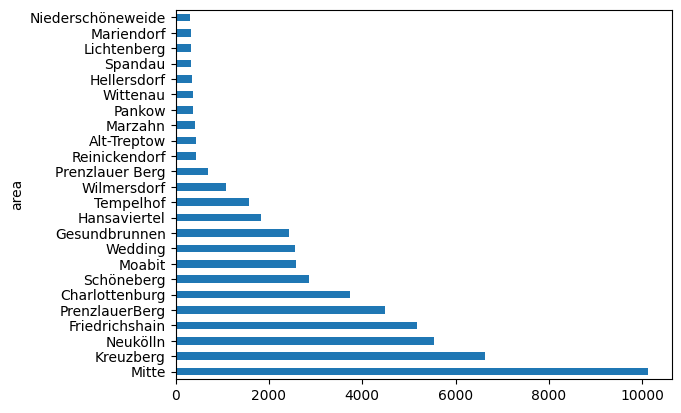

In [8]:
areas = data["area"].value_counts()
areas[areas > 300].plot(kind='barh' );

In [9]:
data["station name"].value_counts()

station name
Alexanderplatz       3170
Warschauer Straße    1705
Hermannplatz         1600
Hermannstraße        1584
Kottbusser Tor       1570
                     ... 
Wilhelmshagen           1
Fredersdorf             1
Zwickauer Damm          1
Mahlow                  1
Neu-Westend             1
Name: count, Length: 311, dtype: int64

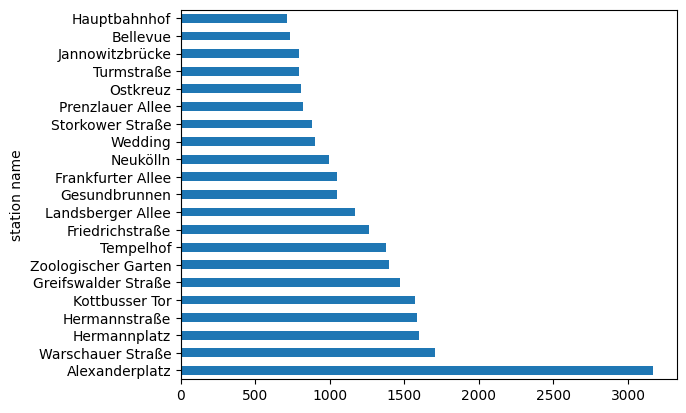

In [10]:
station = data["station name"].value_counts()
station[station > 700].plot(kind='barh');

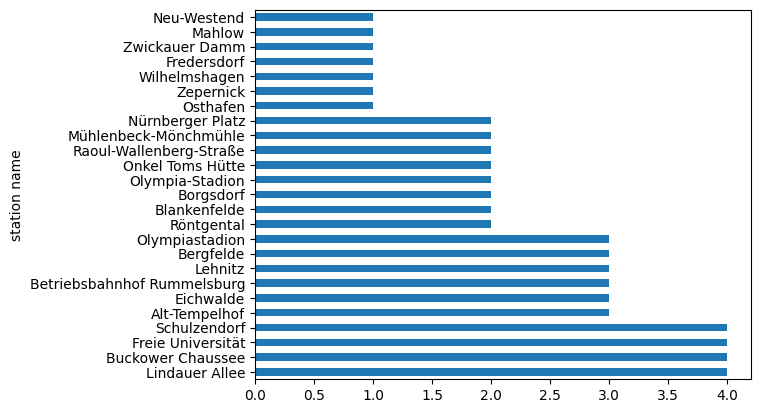

In [11]:
station[station < 5].plot(kind='barh');

In [12]:
lines_counts = []
for entries in data["lines"]:
    lines = entries.split(", ")
    for i in lines:
        lines_counts.append(i)

lines_counts = pd.DataFrame(lines_counts)
counts = lines_counts.value_counts()

In [13]:
lines_counts.value_counts()

S41    17352
S42    17352
U8     14298
S7     13471
S3     13153
S9     12868
S5     12770
U7      8891
U6      8593
S8      8467
U2      8373
S85     8346
U5      7723
S46     7372
U3      6983
U1      6673
U9      6074
S1      5370
S2      5323
S45     5178
S26     5061
S25     4890
S75     3547
S47     3107
U4       550
Name: count, dtype: int64

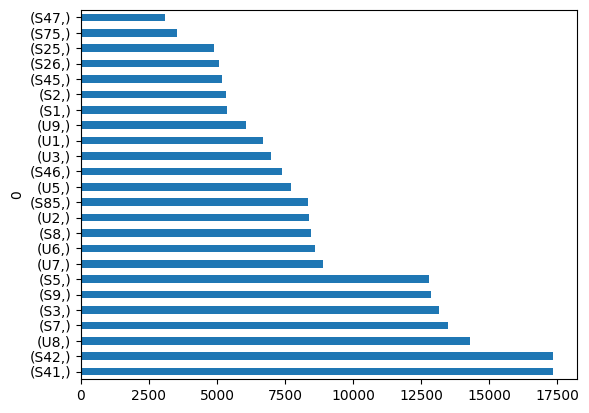

In [14]:
counts[counts > 1000].plot(kind='barh');

In [15]:
# Year
# Creating a Year column
data["year"] = data.index
data["year"] = pd.to_datetime(data["year"])
data["year"] = data["year"].dt.year

# Months
# Creating a Month column
data["month"] = data.index
data["month"] = pd.to_datetime(data["month"])
data["month"] = data["month"].dt.month
# Naming the months
months = {
    1: "January", 2: "February", 3: "March", 
    4: "April", 5: "May", 6: "June", 7: "July", 
    8: "August", 9: "September", 10: "October", 
    11: "November", 12: "December"
}
# Applying the naming
data["month"] = data["month"].map(months)

# Weekdays
# Creating a Weekday column
data["weekday"] = data.index
data["weekday"] = pd.to_datetime(data["weekday"])
data["weekday"] = data["weekday"].dt.weekday
# Naming the weekdays
weekdays = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
# Applying the naming
data["weekday"] = data["weekday"].map(weekdays)

# Hours of the day
data["hour"] = data.index
data["hour"] = pd.to_datetime(data["hour"])
data["hour"] = data["hour"].dt.hour

In [16]:
data["year"].value_counts()

year
2021    14363
2020    12443
2022    11148
2019     9504
2023     8780
2018     4104
Name: count, dtype: int64

In [17]:
data["month"].value_counts()

month
May          6049
March        5823
February     5548
November     5515
January      5423
June         5137
October      5049
April        4742
July         4597
December     4355
September    4246
August       3858
Name: count, dtype: int64

In [18]:
data["weekday"].value_counts()

weekday
Wednesday    11365
Tuesday      11309
Thursday     11206
Monday        9552
Friday        9280
Sunday        4017
Saturday      3613
Name: count, dtype: int64

In [19]:
data["hour"].value_counts()

hour
11    6786
12    6280
10    5826
8     5252
9     5240
13    5126
7     4629
14    4079
15    3386
16    3079
6     2840
17    2628
18    1583
5     1131
19     674
20     435
21     365
22     287
4      268
23     167
0       99
3       68
1       61
2       53
Name: count, dtype: int64

In [20]:
data[data['station_key'] == 'alex'].index = pd.to_datetime(data[data['station_key'] == 'alex'].index)

<Axes: xlabel='date'>

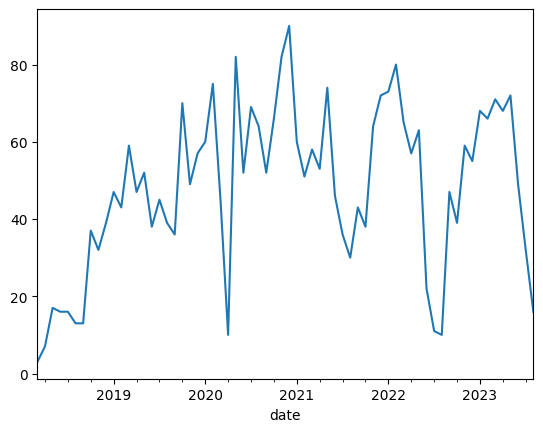

In [21]:
data[data['station_key'] == 'alex'].resample('m')['station_key'].count().plot()

<Axes: xlabel='date'>

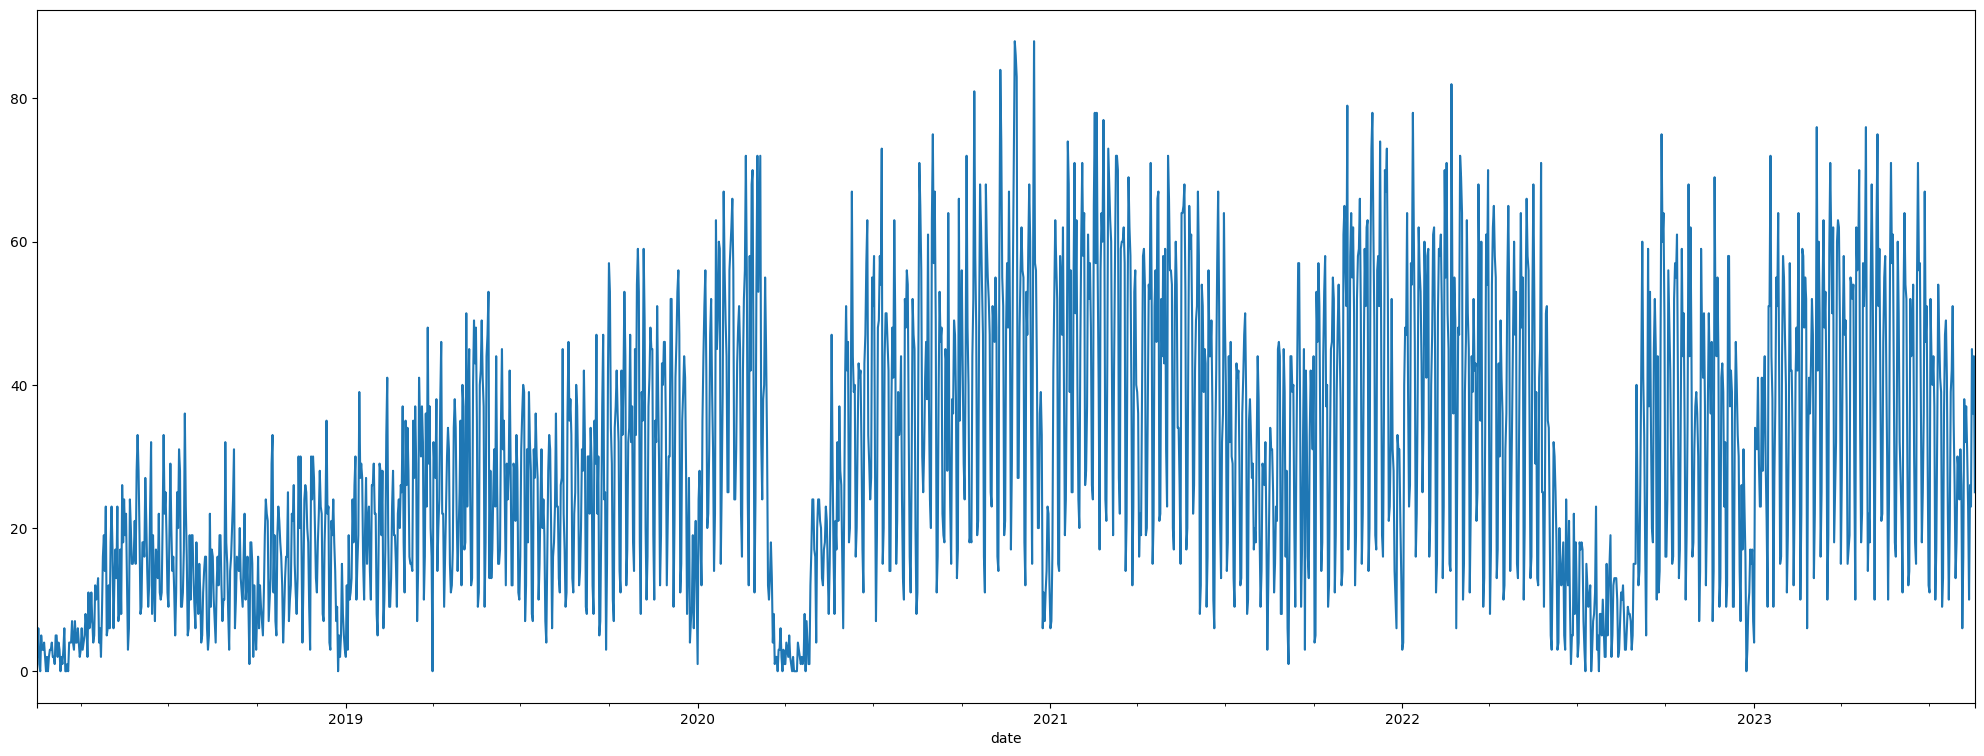

In [23]:
plt.figure(figsize=(25,9))
data.resample('d')['station_key'].count().plot()

In [24]:
data.nunique()

station_key       311
text            60032
station name      311
lines              95
area               94
latitude          260
longitude         291
keys              311
dtype: int64

In [28]:
data.iloc[0]

station_key                                                wildau
text            https  shopdigitalcouragedelichtbildausweismit...
station name                                               Wildau
lines                                                         S46
area                                                       Wildau
latitude                                                    52.32
longitude                                               13.633889
keys                                                       wildau
Name: 2018-02-15 12:03:54, dtype: object

In [27]:
hourly_controls = data.resample('h')['station_key'].count()

<Axes: xlabel='date'>

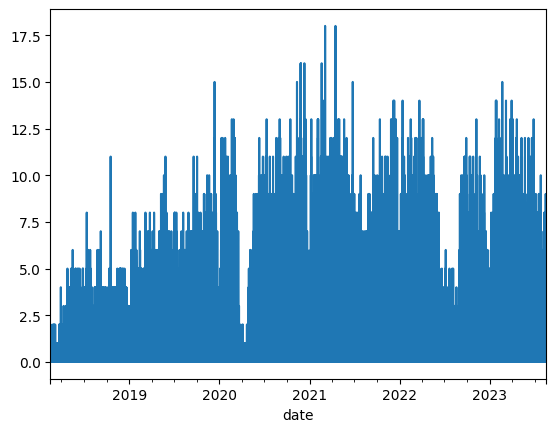

In [28]:
data.resample('h')['station_key'].count().plot()

In [29]:
(data.resample('h')['station_key'].count() == 0).sum()

27022

In [30]:
data.resample('h')['station_key'].count().shape

(48241,)

In [24]:
data

,station_key,text,station name,lines,area,latitude,longitude,year,month,weekday,hour
date,,,,,,,,,,,
2018-02-15 12:03:54,wildau,https shopdigitalcouragedelichtbildausweismit...,Wildau,S46,Wildau,52.320000,13.633889,2018,February,Thursday,12
2018-02-15 18:44:50,erkner,kritik durchaus berechtigt sehe aba tatsache g...,Erkner,S3,Erkner,52.429722,13.751389,2018,February,Thursday,18
2018-02-16 07:39:11,hellersdorf,hoelle,Hellersdorf,U5,Hellersdorf,52.536667,13.606389,2018,February,Friday,7
2018-02-16 12:12:04,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,2018,February,Friday,12
2018-02-16 14:31:21,beusselstr,beusselstr s42 glaube beussel,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,2018,February,Friday,14
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18 11:16:15,hermannplatz,u7 hermannplatz richtung spandau 2 kontrolleur...,Hermannplatz,"U7, U8",Neukölln,52.487222,13.424722,2023,August,Friday,11
2023-08-18 11:28:34,treptower park,s42 ringbahn treptower park 3 personen,Treptower Park,"S41, S42, S8, S85, S9",Alt-Treptow,52.493889,13.461389,2023,August,Friday,11
2023-08-18 11:33:54,beusselstr,beusselstr rotes balenciaga,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,2023,August,Friday,11


# Model / Prediction

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
from ticket_control.fuzz_flow import create_station_to_line_df

/Users/annushkak/code/akinml/ticket-control-bvg/data


[nltk_data] Downloading package punkt to /Users/annushkak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
data['keys'] = data['station_key']

In [6]:
line_to_station = create_station_to_line_df(data)

In [7]:
line_to_station

,station_key,line
0,wildau,S46
1,erkner,S3
2,hellersdorf,U5
3,zoo,U2
4,zoo,U9
...,...,...
131927,augsburger str,U3
148543,alt tempelhof,U6
167398,muehlenbeck moenchmuehle,S8
175357,osthafen,U1


In [10]:
u7 = list(line_to_station[line_to_station['line'] == 'U7']['station_key'].unique())

In [13]:
data

,date,station_key,text,station name,lines,area,latitude,longitude,keys
0,2018-02-15 12:03:54,wildau,https shopdigitalcouragedelichtbildausweismit...,Wildau,S46,Wildau,52.320000,13.633889,wildau
1,2018-02-15 18:44:50,erkner,kritik durchaus berechtigt sehe aba tatsache g...,Erkner,S3,Erkner,52.429722,13.751389,erkner
2,2018-02-16 07:39:11,hellersdorf,hoelle,Hellersdorf,U5,Hellersdorf,52.536667,13.606389,hellersdorf
3,2018-02-16 12:12:04,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,zoo
4,2018-02-16 14:31:21,beusselstr,beusselstr s42 glaube beussel,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,beusselstr
...,...,...,...,...,...,...,...,...,...
60337,2023-08-18 11:16:15,hermannplatz,u7 hermannplatz richtung spandau 2 kontrolleur...,Hermannplatz,"U7, U8",Neukölln,52.487222,13.424722,hermannplatz
60338,2023-08-18 11:28:34,treptower park,s42 ringbahn treptower park 3 personen,Treptower Park,"S41, S42, S8, S85, S9",Alt-Treptow,52.493889,13.461389,treptower park
60339,2023-08-18 11:33:54,beusselstr,beusselstr rotes balenciaga,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,beusselstr
60340,2023-08-18 12:10:31,friedrichsfelde,u5 friedrichsfelde 2x blau,Friedrichsfelde,U5,Friedrichsfelde,52.506111,13.512778,friedrichsfelde


In [18]:
data[data['keys'].isin(u7)].sort_values(by='date')

,date,station_key,text,station name,lines,area,latitude,longitude,keys
10,2018-02-19 11:13:38,jungfernheide,s42 jungefernheide,Jungfernheide,"U7, U7, S41, S42",Charlottenburg,52.530556,13.300139,jungfernheide
13,2018-02-19 18:53:58,jungfernheide,ringbahn 41 gleich jungfernheide drei stueck,Jungfernheide,"U7, U7, S41, S42",Charlottenburg,52.530556,13.300139,jungfernheide
35,2018-03-01 14:44:25,mehringdamm,u mehringdamm gerade u7 gestiegen 4 typen gesehen,Mehringdamm,"U6, U7",Kreuzberg,52.494444,13.388611,mehringdamm
36,2018-03-02 08:44:38,mierendorffplatz,grosskontrolle mariendorffplatz u7,Mierendorffplatz,U7,Charlottenburg,52.526667,13.305000,mierendorffplatz
42,2018-03-04 14:34:12,berliner str,sonderfall rasse ticketficker einzelexemplar m...,Berliner Straße,"U7, U9",Wilmersdorf,52.487222,13.330833,berliner str
...,...,...,...,...,...,...,...,...,...
60329,2023-08-18 09:24:34,mehringdamm,mehringdamm beiden wurden dabei gesehen geld...,Mehringdamm,"U6, U7",Kreuzberg,52.494444,13.388611,mehringdamm
60332,2023-08-18 09:58:07,rudow,2 blue vests on u7 richtung rudow,Rudow,U7,Rudow,52.416111,13.495278,rudow
60335,2023-08-18 10:39:41,karl marx str,u7 karlmarxstr richtung spandau 4 kontrolleure...,Karl-Marx-Straße,U7,Neukölln,52.476111,13.439167,karl marx str
60337,2023-08-18 11:16:15,hermannplatz,u7 hermannplatz richtung spandau 2 kontrolleur...,Hermannplatz,"U7, U8",Neukölln,52.487222,13.424722,hermannplatz


# Prediction

# Prediction